In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load data from Excel file
file_path = 'C:/Users/User/OneDrive/Έγγραφα/public_data/ΟΠΑ data final.xlsx'

# Load each sheet into separate DataFrames
receipts_df = pd.read_excel(file_path, sheet_name='Receipts')
visitors_df = pd.read_excel(file_path, sheet_name='Visitors')
schedule_df = pd.read_excel(file_path, sheet_name='Schedule')


# Standardize column names for consistency
receipts_df.columns = receipts_df.columns.str.lower()
visitors_df.columns = visitors_df.columns.str.lower()
schedule_df.columns = schedule_df.columns.str.lower()

# Display the first few rows of each DataFrame to inspect the data
print("Receipts Data:")
print(receipts_df.head())
print("\nVisitors Data:")
print(visitors_df.head())
print("\nSchedule Data:")
print(schedule_df.head())


Receipts Data:
   store  receipts  hour       date
0   6762        69    18 2024-03-09
1   8741        18    14 2024-02-26
2   8741        35    11 2024-04-30
3   6762        48    21 2024-01-05
4   7331        34    16 2024-04-13

Visitors Data:
   store       date  hour  visitors
0   7498 2024-02-11    20         0
1   7498 2024-04-09     8         0
2   7498 2024-09-02    22         0
3   7498 2024-10-21    21         0
4   7331 2024-07-25    15        33

Schedule Data:
        date     start       end  store  employee id
0 2024-01-03  09:00:00  17:00:00   7498         1001
1 2024-01-04  09:00:00  17:00:00   7498         1001
2 2024-01-05  13:00:00  21:00:00   7498         1001
3 2024-01-08  13:00:00  21:00:00   7498         1001
4 2024-01-09  13:00:00  21:00:00   7498         1001


In [4]:
# Display number of columns and rows for each DataFrame
print("\nReceipts Table: {} columns and {} rows".format(receipts_df.shape[1], receipts_df.shape[0]))
print("Visitors Table: {} columns and {} rows".format(visitors_df.shape[1], visitors_df.shape[0]))
print("Schedule Table: {} columns and {} rows".format(schedule_df.shape[1], schedule_df.shape[0]))


Receipts Table: 4 columns and 14538 rows
Visitors Table: 4 columns and 20480 rows
Schedule Table: 5 columns and 22707 rows


In [5]:
# Calculate and display range of values 
print("\nRange of values for each column:")
for df_name, df in zip(['Receipts', 'Visitors', 'Schedule'], [receipts_df, visitors_df, schedule_df]):
    print(f"\n{df_name} Table:")
    for column in df.select_dtypes(include='number').columns:
        col_min = df[column].min()
        col_max = df[column].max()
        print(f"{column}: min = {col_min}, max = {col_max}")


Range of values for each column:

Receipts Table:
store: min = 6762, max = 8741
receipts: min = 1, max = 888
hour: min = 7, max = 22

Visitors Table:
store: min = 6762, max = 8741
hour: min = 7, max = 22
visitors: min = 0, max = 981

Schedule Table:
store: min = 6762, max = 8741
employee id: min = 1001, max = 3497960151


In [6]:
# Display unique values of 'store' column --> see if there are ouliers store
print("\nUnique values of 'store' column in each sheet:")
for df_name, df in zip(['Receipts', 'Visitors', 'Schedule'], [receipts_df, visitors_df, schedule_df]):
    if 'store' in df.columns:
        unique_stores = df['store'].unique()
        print(f"\n{df_name} Table:")
        print(unique_stores)



Unique values of 'store' column in each sheet:

Receipts Table:
[6762 8741 7331 7498]

Visitors Table:
[7498 7331 8741 6762]

Schedule Table:
[7498 6762 7331 8741]


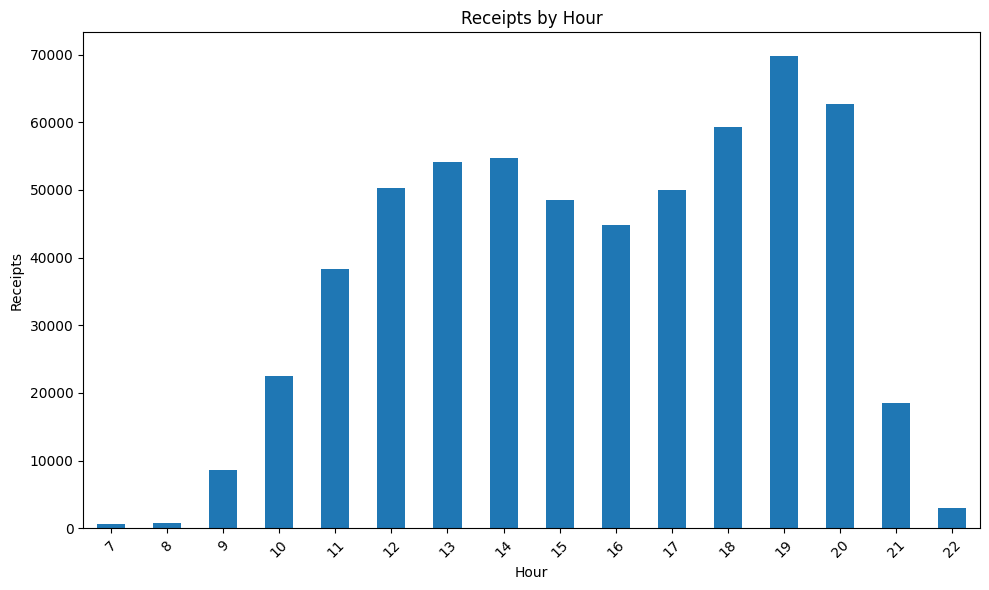

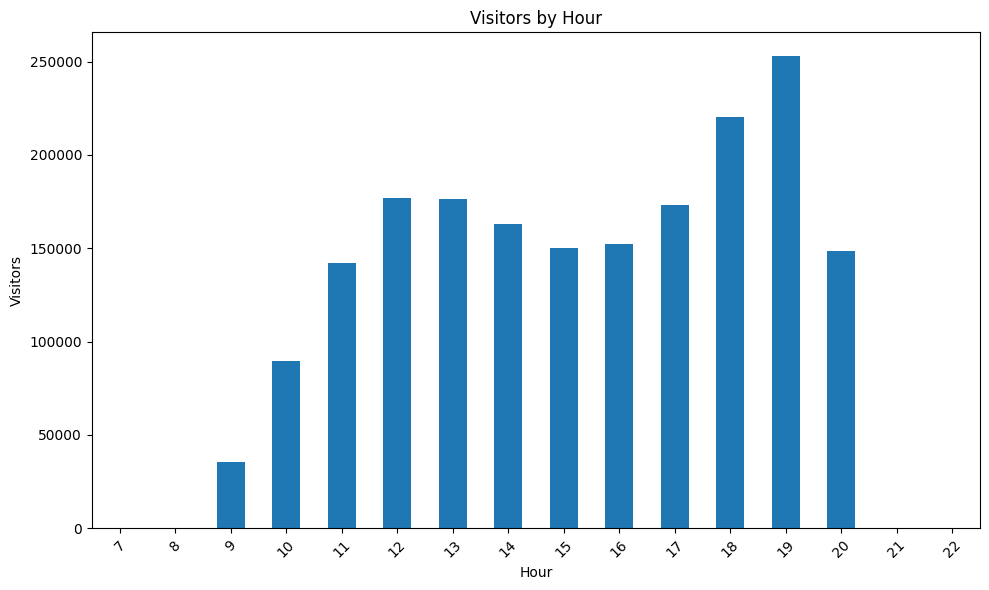

In [7]:
# Create separate bar charts for receipts vs hour and visitors vs hour
# Aggregate data by hour
receipts_by_hour = receipts_df.groupby('hour')['receipts'].sum()
visitors_by_hour = visitors_df.groupby('hour')['visitors'].sum()

# Plot receipts by hour
plt.figure(figsize=(10, 6))
receipts_by_hour.plot(kind='bar', title='Receipts by Hour')
plt.ylabel('Receipts')
plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot visitors by hour
plt.figure(figsize=(10, 6))
visitors_by_hour.plot(kind='bar', title='Visitors by Hour')
plt.ylabel('Visitors')
plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

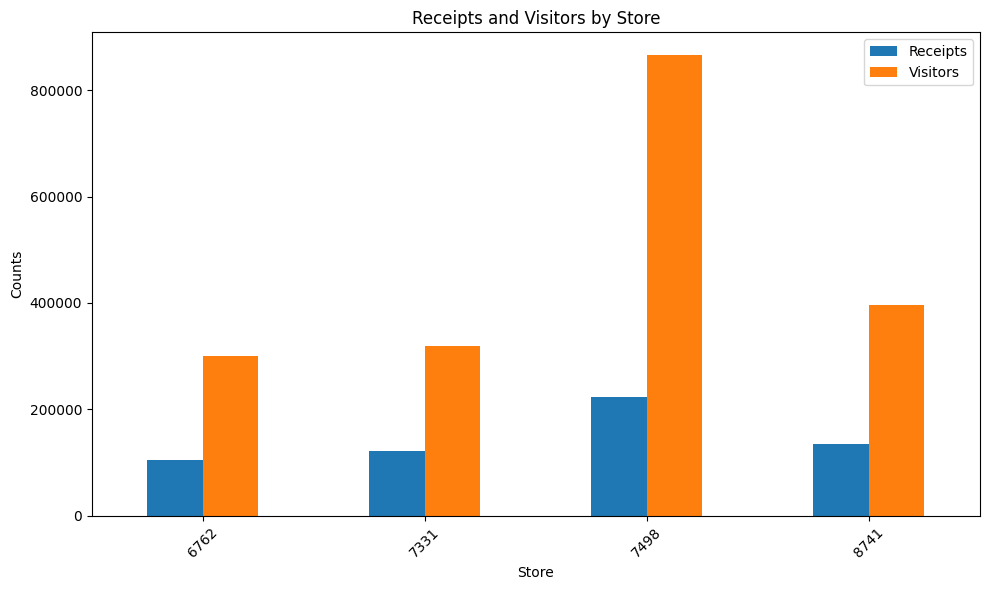

In [8]:
# Create bar chart for receipts and visitors
# Aggregate data by store
receipts_sum = receipts_df.groupby('store')['receipts'].sum()
visitors_sum = visitors_df.groupby('store')['visitors'].sum()

# Merge aggregated data for plotting
combined_data = pd.DataFrame({'Receipts': receipts_sum, 'Visitors': visitors_sum}).reset_index()

# Plot the bar chart
combined_data.plot(x='store', kind='bar', figsize=(10, 6), title='Receipts and Visitors by Store')
plt.ylabel('Counts')
plt.xlabel('Store')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Merge visitors and receipts DataFrames on store, hour, and date
merged_df = pd.merge(visitors_df, receipts_df, on=['store', 'hour', 'date'], how='inner')

# Display the first few rows of the merged DataFrame
print("\nMerged Data:")
print(merged_df.head())

# Find and display null values in the merged DataFrame
print("\nNull Values in Merged Data:")
print(merged_df.isnull().sum())


Merged Data:
   store       date  hour  visitors  receipts
0   7498 2024-04-09     8         0         1
1   7498 2024-10-21    21         0        14
2   7331 2024-07-25    15        33        14
3   7331 2024-04-22    17        76        13
4   8741 2024-10-26     9        39        12

Null Values in Merged Data:
store       0
date        0
hour        0
visitors    0
receipts    0
dtype: int64


In [10]:
# Display rows where visitors < receipts
visitor_less_receipts = merged_df[merged_df['visitors'] < merged_df['receipts']]
print("\nRows where visitors < receipts:")
print(visitor_less_receipts)


Rows where visitors < receipts:
       store       date  hour  visitors  receipts
0       7498 2024-04-09     8         0         1
1       7498 2024-10-21    21         0        14
14      8741 2024-01-23    21         0         5
28      8741 2024-11-01    22         0         5
33      6762 2024-09-28    20         0        46
...      ...        ...   ...       ...       ...
14114   7331 2024-11-25    22         0         2
14118   7331 2024-08-12    21         0         4
14121   8741 2024-05-16    21         0         5
14127   6762 2024-02-22    21         0         7
14130   6762 2024-05-10    19         0        52

[1812 rows x 5 columns]


In [22]:
print("\nRanges for Visitors and Receipts:")
visitor_ranges = merged_df['visitors'].value_counts().sort_index()
receipt_ranges = merged_df['receipts'].value_counts().sort_index()

print("Visitors Ranges:")
for value, count in visitor_ranges.items():
    print(f"Visitor {value}: [{count} occurrences]")

# Calculate and print the percentage of visitors with value 0
zero_visitors = (visitors_df['visitors'] == 0).sum()
total_visitors = visitors_df['visitors'].count()
percentage_zero_visitors = (zero_visitors / total_visitors) * 100

print(f"\nPercentage of Visitors with Value 0: {percentage_zero_visitors:.2f}%")




Ranges for Visitors and Receipts:
Visitors Ranges:
Visitor 0: [1711 occurrences]
Visitor 1: [22 occurrences]
Visitor 2: [19 occurrences]
Visitor 3: [7 occurrences]
Visitor 4: [8 occurrences]
Visitor 5: [4 occurrences]
Visitor 7: [3 occurrences]
Visitor 8: [2 occurrences]
Visitor 10: [1 occurrences]
Visitor 11: [1 occurrences]
Visitor 13: [3 occurrences]
Visitor 15: [1 occurrences]
Visitor 16: [2 occurrences]
Visitor 17: [3 occurrences]
Visitor 18: [2 occurrences]
Visitor 19: [6 occurrences]
Visitor 20: [7 occurrences]
Visitor 21: [8 occurrences]
Visitor 22: [3 occurrences]
Visitor 23: [9 occurrences]
Visitor 24: [7 occurrences]
Visitor 25: [14 occurrences]
Visitor 26: [20 occurrences]
Visitor 27: [18 occurrences]
Visitor 28: [15 occurrences]
Visitor 29: [30 occurrences]
Visitor 30: [22 occurrences]
Visitor 31: [27 occurrences]
Visitor 32: [27 occurrences]
Visitor 33: [39 occurrences]
Visitor 34: [31 occurrences]
Visitor 35: [32 occurrences]
Visitor 36: [45 occurrences]
Visitor 37: [47

In [12]:
print("\nReceipts Ranges:")
for value, count in receipt_ranges.items():
    print(f"Receipt {value}: [{count} occurrences]")



Receipts Ranges:
Receipt 1: [200 occurrences]
Receipt 2: [139 occurrences]
Receipt 3: [136 occurrences]
Receipt 4: [129 occurrences]
Receipt 5: [144 occurrences]
Receipt 6: [135 occurrences]
Receipt 7: [131 occurrences]
Receipt 8: [137 occurrences]
Receipt 9: [168 occurrences]
Receipt 10: [173 occurrences]
Receipt 11: [169 occurrences]
Receipt 12: [169 occurrences]
Receipt 13: [186 occurrences]
Receipt 14: [202 occurrences]
Receipt 15: [197 occurrences]
Receipt 16: [209 occurrences]
Receipt 17: [209 occurrences]
Receipt 18: [231 occurrences]
Receipt 19: [206 occurrences]
Receipt 20: [272 occurrences]
Receipt 21: [209 occurrences]
Receipt 22: [259 occurrences]
Receipt 23: [268 occurrences]
Receipt 24: [270 occurrences]
Receipt 25: [264 occurrences]
Receipt 26: [283 occurrences]
Receipt 27: [241 occurrences]
Receipt 28: [271 occurrences]
Receipt 29: [283 occurrences]
Receipt 30: [280 occurrences]
Receipt 31: [303 occurrences]
Receipt 32: [248 occurrences]
Receipt 33: [229 occurrences]
R

In [13]:
# Display the total receipts where visitors are 0
receipts_for_zero_visitors = merged_df[merged_df['visitors'] == 0]['receipts'].sum()
print(f"\nTotal receipts where visitors are 0: {receipts_for_zero_visitors}")



Total receipts where visitors are 0: 32997


In [14]:
# Display the range of receipts for each visitor count
print("\nRange of receipts for each visitor count:")
visitor_receipt_ranges = merged_df.groupby('visitors')['receipts'].agg(['min', 'max']).reset_index()
print(visitor_receipt_ranges)


Range of receipts for each visitor count:
     visitors  min  max
0           0    1  470
1           1    1   21
2           2    1  116
3           3    1   16
4           4    1   71
..        ...  ...  ...
681       868  216  216
682       881  157  157
683       893  181  181
684       920  170  170
685       981  185  185

[686 rows x 3 columns]


In [15]:
# Find rows where 50 <= receipts - visitors
difference_gte_50_df = merged_df[(merged_df['receipts'] - merged_df['visitors']) >= 50]
print("\nRows where receipts - visitors >= 50:")
print(difference_gte_50_df)



Rows where receipts - visitors >= 50:
       store       date  hour  visitors  receipts
70      7498 2024-04-26    21         0       102
126     8741 2024-09-17    20         0        62
226     7498 2024-10-31    13         0        51
253     7498 2024-04-19    21         0        56
424     6762 2024-09-21    20         0        60
...      ...        ...   ...       ...       ...
13304   8741 2024-05-09    21         0        87
13879   8741 2024-03-09    20         0        58
14041   6762 2024-09-11    21         0        72
14061   8741 2024-10-31    18         0        61
14130   6762 2024-05-10    19         0        52

[160 rows x 5 columns]


In [16]:
# For each row in the filtered DataFrame, find the previous row with the same store, date, and hour - 1
timeline_data = []
for _, current_row in difference_gte_50_df.iterrows():
    previous_row = merged_df[
        (merged_df['store'] == current_row['store']) &
        (merged_df['date'] == current_row['date']) &
        (merged_df['hour'] == current_row['hour'] - 1)
    ]
    if not previous_row.empty:
        timeline_data.append({
            "Previous Row": previous_row.iloc[0].to_dict(),
            "Current Row": current_row.to_dict()
        })

# Print the timeline data
print("\nTimeline Data (Previous and Current Rows with Same Store, Date, and Hour - 1):")
for pair in timeline_data:
    print("Previous Row:", pair["Previous Row"])
    print("Current Row:", pair["Current Row"])
    print("---")



Timeline Data (Previous and Current Rows with Same Store, Date, and Hour - 1):
Previous Row: {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 20, 'visitors': 484, 'receipts': 82}
Current Row: {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 21, 'visitors': 0, 'receipts': 102}
---
Previous Row: {'store': 8741, 'date': Timestamp('2024-09-17 00:00:00'), 'hour': 19, 'visitors': 285, 'receipts': 74}
Current Row: {'store': 8741, 'date': Timestamp('2024-09-17 00:00:00'), 'hour': 20, 'visitors': 0, 'receipts': 62}
---
Previous Row: {'store': 7498, 'date': Timestamp('2024-10-31 00:00:00'), 'hour': 12, 'visitors': 0, 'receipts': 60}
Current Row: {'store': 7498, 'date': Timestamp('2024-10-31 00:00:00'), 'hour': 13, 'visitors': 0, 'receipts': 51}
---
Previous Row: {'store': 7498, 'date': Timestamp('2024-04-19 00:00:00'), 'hour': 20, 'visitors': 362, 'receipts': 33}
Current Row: {'store': 7498, 'date': Timestamp('2024-04-19 00:00:00'), 'hour': 21, 'visitors': 0, '

In [17]:
# For each row in the filtered DataFrame, find the previous rows with the same store, date, and hour - 1 and hour - 2
timeline_data = []
for _, current_row in difference_gte_50_df.iterrows():
    previous_row_1 = merged_df[
        (merged_df['store'] == current_row['store']) &
        (merged_df['date'] == current_row['date']) &
        (merged_df['hour'] == current_row['hour'] - 1)
    ]
    previous_row_2 = merged_df[
        (merged_df['store'] == current_row['store']) &
        (merged_df['date'] == current_row['date']) &
        (merged_df['hour'] == current_row['hour'] - 2)
    ]
    timeline_data.append({
        "Previous Row (Hour - 1)": previous_row_1.iloc[0].to_dict() if not previous_row_1.empty else None,
        "Previous Row (Hour - 2)": previous_row_2.iloc[0].to_dict() if not previous_row_2.empty else None,
        "Current Row": current_row.to_dict()
    })

# Print the timeline data
print("\nTimeline Data (Previous Rows and Current Row):")
for pair in timeline_data:
    print("Previous Row (Hour - 2):", pair["Previous Row (Hour - 2)"])
    print("Previous Row (Hour - 1):", pair["Previous Row (Hour - 1)"])
    print("Current Row:", pair["Current Row"])
    print("---")



Timeline Data (Previous Rows and Current Row):
Previous Row (Hour - 2): {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 19, 'visitors': 544, 'receipts': 78}
Previous Row (Hour - 1): {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 20, 'visitors': 484, 'receipts': 82}
Current Row: {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 21, 'visitors': 0, 'receipts': 102}
---
Previous Row (Hour - 2): {'store': 8741, 'date': Timestamp('2024-09-17 00:00:00'), 'hour': 18, 'visitors': 196, 'receipts': 50}
Previous Row (Hour - 1): {'store': 8741, 'date': Timestamp('2024-09-17 00:00:00'), 'hour': 19, 'visitors': 285, 'receipts': 74}
Current Row: {'store': 8741, 'date': Timestamp('2024-09-17 00:00:00'), 'hour': 20, 'visitors': 0, 'receipts': 62}
---
Previous Row (Hour - 2): {'store': 7498, 'date': Timestamp('2024-10-31 00:00:00'), 'hour': 11, 'visitors': 0, 'receipts': 41}
Previous Row (Hour - 1): {'store': 7498, 'date': Timestamp('2024-10-31 00:00:

In [18]:
# For each row in the filtered DataFrame, find the previous rows with the same store, date, and hour - 1, hour - 2, and hour - 3
timeline_data = []
true_count = 0
for _, current_row in difference_gte_50_df.iterrows():
    previous_row_1 = merged_df[
        (merged_df['store'] == current_row['store']) &
        (merged_df['date'] == current_row['date']) &
        (merged_df['hour'] == current_row['hour'] - 1)
    ]
    previous_row_2 = merged_df[
        (merged_df['store'] == current_row['store']) &
        (merged_df['date'] == current_row['date']) &
        (merged_df['hour'] == current_row['hour'] - 2)
    ]
    previous_row_3 = merged_df[
        (merged_df['store'] == current_row['store']) &
        (merged_df['date'] == current_row['date']) &
        (merged_df['hour'] == current_row['hour'] - 3)
    ]
    if current_row['visitors'] == 0:
        formula_condition = (
            ((previous_row_3['visitors'].iloc[0] - previous_row_3['receipts'].iloc[0]) +
             (previous_row_2['visitors'].iloc[0] - previous_row_2['receipts'].iloc[0])) * 3
        ) <= current_row['receipts'] if not previous_row_3.empty and not previous_row_2.empty else False

        if formula_condition:
            true_count += 1

        timeline_data.append({
            "Previous Row (Hour - 1)": previous_row_1.iloc[0].to_dict() if not previous_row_1.empty else None,
            "Previous Row (Hour - 2)": previous_row_2.iloc[0].to_dict() if not previous_row_2.empty else None,
            "Previous Row (Hour - 3)": previous_row_3.iloc[0].to_dict() if not previous_row_3.empty else None,
            "Current Row": current_row.to_dict(),
            "Formula Condition Met": formula_condition
        })

# Print the timeline data with the formula condition
print("\nTimeline Data (Previous Rows and Current Row with Formula Condition):")
for pair in timeline_data:
    print("Previous Row (Hour - 3):", pair["Previous Row (Hour - 3)"])
    print("Previous Row (Hour - 2):", pair["Previous Row (Hour - 2)"])
    print("Previous Row (Hour - 1):", pair["Previous Row (Hour - 1)"])
    print("Current Row:", pair["Current Row"])
    print("Formula Condition Met:", pair["Formula Condition Met"])
    print("---")

# Print the count of rows where the formula condition was met
print(f"\nCount of rows where the formula condition was met: {true_count}")




Timeline Data (Previous Rows and Current Row with Formula Condition):
Previous Row (Hour - 3): {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 18, 'visitors': 402, 'receipts': 64}
Previous Row (Hour - 2): {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 19, 'visitors': 544, 'receipts': 78}
Previous Row (Hour - 1): {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 20, 'visitors': 484, 'receipts': 82}
Current Row: {'store': 7498, 'date': Timestamp('2024-04-26 00:00:00'), 'hour': 21, 'visitors': 0, 'receipts': 102}
Formula Condition Met: False
---
Previous Row (Hour - 3): {'store': 8741, 'date': Timestamp('2024-09-17 00:00:00'), 'hour': 17, 'visitors': 155, 'receipts': 56}
Previous Row (Hour - 2): {'store': 8741, 'date': Timestamp('2024-09-17 00:00:00'), 'hour': 18, 'visitors': 196, 'receipts': 50}
Previous Row (Hour - 1): {'store': 8741, 'date': Timestamp('2024-09-17 00:00:00'), 'hour': 19, 'visitors': 285, 'receipts': 74}
Current Row: 

In [19]:
# Remove rows from merged_df where the formula condition is met --> den to exo texei akoma
to_remove_indices = [pair['Current Row']['index'] for pair in timeline_data if pair['Formula Condition Met']]
merged_df = merged_df.drop(index=to_remove_indices)

# Display the updated merged DataFrame
print("\nUpdated Merged DataFrame after removing outliers:")
print(merged_df)

KeyError: 'index'